In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

In [3]:
# 1.

iris_data = np.loadtxt('../data/irisdata.txt', comments='%')
x = iris_data[0:50, 0:4]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


In [4]:
# 2.
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print(f"Variance of sepal length: {var_sep_l}")
print(f"Variance of sepal width: {var_sep_w}")
print(f"Variance of petal length: {var_pet_l}")
print(f"Variance of petal width: {var_pet_w}")

Variance of sepal length: 0.12424897959183677
Variance of sepal width: 0.1436897959183674
Variance of petal length: 0.030159183673469384
Variance of petal width: 0.01110612244897959


### Exercise 3

Now compute the covariance:  
$$\sigma^2 = \frac{1}{N-1} \sum_i a_i b_i$$

between the sepal length and the sepal width. Please note that we use $N − 1$ instead of just $N$ in the computation of the covariance. The reason for this can be found in estimation theory. Also note that the covariance we compute is not equal to for example the Numpy `cov` function. It can, though, still tell us something about the data.

Compute the covariance between the sepal length and the petal length and compare it to the covariance between the sepal length and width. What do you observe?

In [5]:
# 3. Covariance

# Calculate means
mean_sep_l = sep_l.mean()
mean_sep_w = sep_w.mean()
mean_pet_l = pet_l.mean()

N = len(sep_l)

# Covariance between sepal length and sepal width
cov_sep_l_sep_w = np.sum((sep_l - mean_sep_l) * (sep_w - mean_sep_w)) / (N - 1)

# Covariance between sepal length and petal length
cov_sep_l_pet_l = np.sum((sep_l - mean_sep_l) * (pet_l - mean_pet_l)) / (N - 1)

print(f"Covariance between sepal length and sepal width: {cov_sep_l_sep_w}")
print(f"Covariance between sepal length and petal length: {cov_sep_l_pet_l}")


Covariance between sepal length and sepal width: 0.09921632653061223
Covariance between sepal length and petal length: 0.016355102040816326


<Figure size 640x480 with 0 Axes>

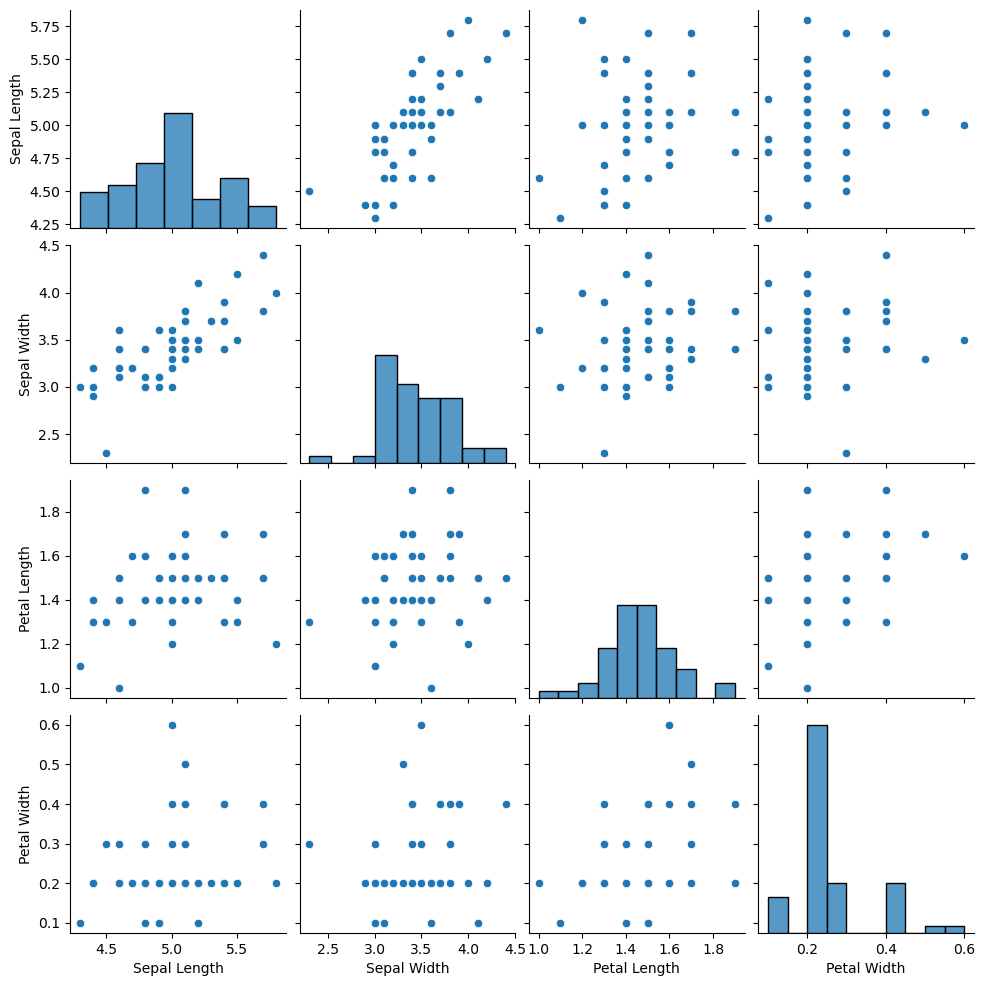

In [ ]:
# 4.
import seaborn as sns
import pandas as pd

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
sns.pairplot(d)
plt.show()

### Exercise 5

In the first approach, we do the analysis step-wise. Start by subtracting the mean from the data:
```python
mn = np.mean(x, axis=0)
data = x - mn
```
Now compute the covariance matrix using: $$\mathbf{C}_\mathbf{X} = \frac{1}{N-1} \mathbf{X}^\text{T} \mathbf{X}$$
Remember to use the data, where the mean has been subtracted. You can use the NumPy function `matmul` to multiply two matrices together. Also remember to transpose data in one of the arguments to the function.

You can also use the NumPy function cov to compute the covariance matrix. Verify if the two approaches give the same result?

In [ ]:
# 5.
mn = np.mean(x, axis=0)
data = x - mn

N = data.shape[0]

# Compute covariance matrix using the formula
cov_matrix_manual = np.matmul(data.T, data) / (N - 1)
print("Covariance matrix (manual):")
print(cov_matrix_manual)

# Compare with numpy's cov function
cov_matrix_np = np.cov(x, rowvar=False)
print("Covariance matrix (numpy):")
print(cov_matrix_np)

# the two matrices give the same result


Covariance matrix (manual):
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
Covariance matrix (numpy):
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [9]:
# 6. Now you can compute the principal components using eigenvector analysis:
values, vectors = np.linalg.eig(cov_matrix_np)
# The values are the eigenvalues and the vectors are the eigenvectors (the principal components).
print("Eigenvalues:")
print(values)
print("Eigenvectors:")
print(vectors)

Eigenvalues:
[0.23645569 0.03691873 0.0267964  0.00903326]
Eigenvectors:
[[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]


### Exercise 7

Lets examine some properties of the principal components. First try to find out how much of the total variation the first component explains?

First principal component explains 76.47% of the total variance.


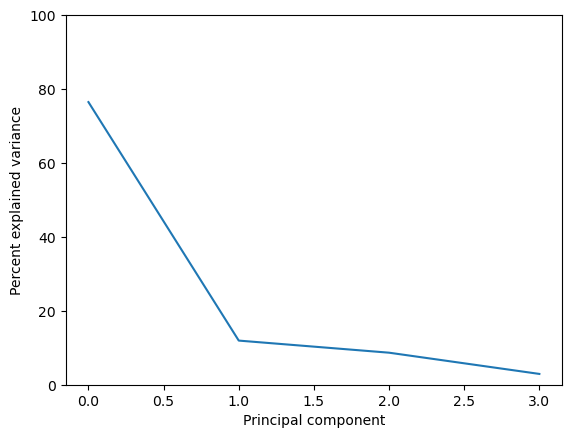

In [10]:
# 7. Percent of total variation explained by the first principal component
explained_var_first = values[0] / values.sum() * 100
print(f"First principal component explains {explained_var_first:.2f}% of the total variance.")

# You can also plot the amount of explained variation for each component:
v_norm = values / values.sum() * 100
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

<Figure size 640x480 with 0 Axes>

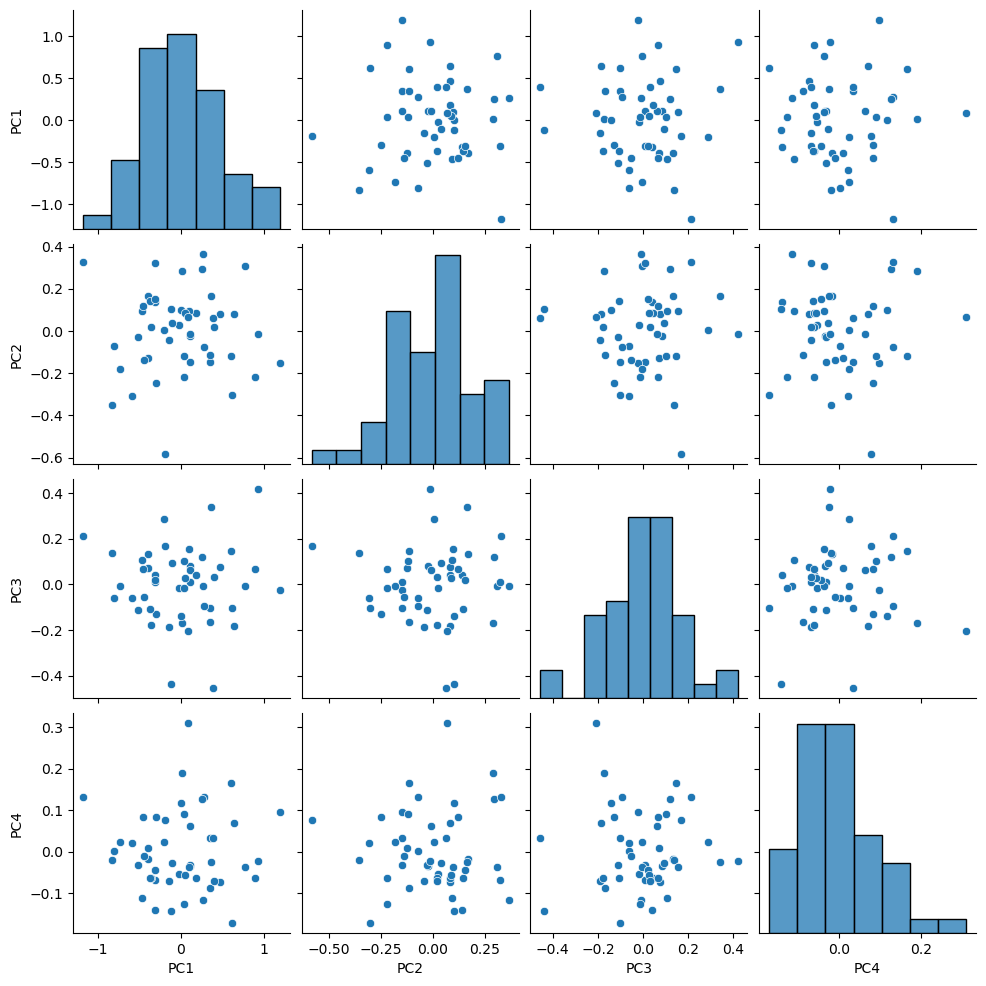

In [ ]:
# 8. The data can be projected onto the PCA space by using the dot-product:
pc_proj = vectors.T.dot(data.T)

# Try to use seaborns pairplot with the projected data? How does the covariance structure look?
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(pc_proj.T, columns=[f'PC{i+1}' for i in range(pc_proj.shape[0])])
sns.pairplot(d)
plt.show()

# How does the covariance structure look?
# There seem to be no covariance between the principal components, which is as expected since they are orthogonal.

### Direct PCA using the decompositions functions

The Python machine learning package sci-kit learn (*sklearn*) have several functions to do data decompositions, where PCA is one of them.

Let us explore if we get the same results using this function.  
Start by installing *sklearn* (see Appendix A) and importing the package:
```python
from sklearn import decomposition
```


<Figure size 640x480 with 0 Axes>

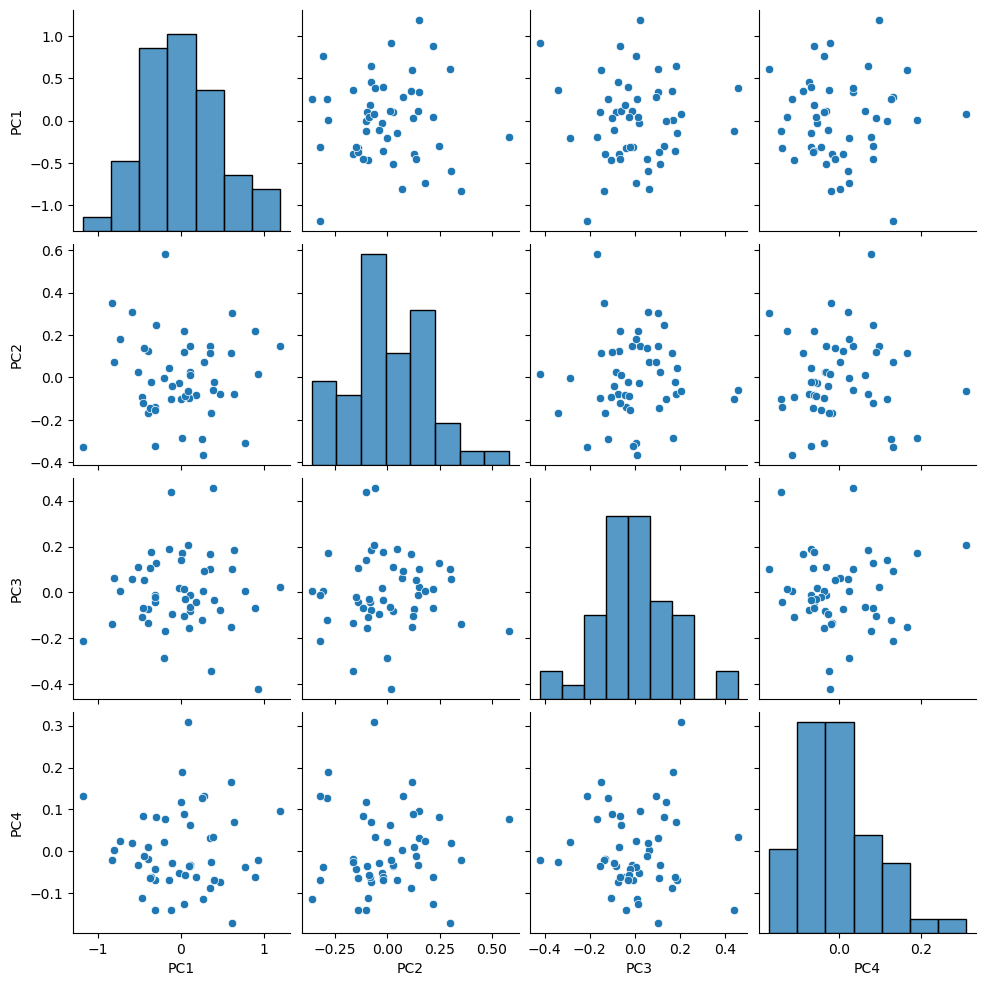

In [12]:
# 9. Read the data matrix as before, but do not subtract the mean. 
# The procedure subtracts the mean for you.
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(x)

plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(data_transform, columns=[f'PC{i+1}' for i in range(data_transform.shape[1])])
sns.pairplot(d)
plt.show()